In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv("exchange07062021.csv", index_col=False)

In [3]:
df.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,6/4/2021,US DOLLAR,2021,June,409.1800,409.6800,410.1800
1,6/4/2021,POUNDS STERLING,2021,June,578.5396,579.2466,579.9535
2,6/4/2021,EURO,2021,June,495.9262,496.5322,497.1382
3,6/4/2021,SWISS FRANC,2021,June,452.5827,453.1357,453.6888
4,6/4/2021,YEN,2021,June,3.7161,3.7206,3.7252


In [4]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [5]:
df.head()

,rate_date,currency,rate_year,rate_month,buying_rate,central_rate,selling_rate
0,6/4/2021,US DOLLAR,2021,June,409.1800,409.6800,410.1800
1,6/4/2021,POUNDS STERLING,2021,June,578.5396,579.2466,579.9535
2,6/4/2021,EURO,2021,June,495.9262,496.5322,497.1382
3,6/4/2021,SWISS FRANC,2021,June,452.5827,453.1357,453.6888
4,6/4/2021,YEN,2021,June,3.7161,3.7206,3.7252


In [6]:
df.drop(["buying_rate", "central_rate"], axis=1, inplace=True)

In [7]:
df.shape

(46459, 5)

In [8]:
df.isnull().sum()

rate_date       0
currency        0
rate_year       0
rate_month      0
selling_rate    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46459 entries, 0 to 46458
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rate_date     46459 non-null  object 
 1   currency      46459 non-null  object 
 2   rate_year     46459 non-null  int64  
 3   rate_month    46459 non-null  object 
 4   selling_rate  46459 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [10]:
df["rate_date"] = pd.to_datetime(df.rate_date) 

In [11]:
df.rate_date.dt.dayofweek

0        4
1        4
2        4
3        4
4        4
        ..
46454    0
46455    0
46456    0
46457    0
46458    0
Name: rate_date, Length: 46459, dtype: int64

In [12]:
df.head()

,rate_date,currency,rate_year,rate_month,selling_rate
0,2021-06-04,US DOLLAR,2021,June,410.1800
1,2021-06-04,POUNDS STERLING,2021,June,579.9535
2,2021-06-04,EURO,2021,June,497.1382
3,2021-06-04,SWISS FRANC,2021,June,453.6888
4,2021-06-04,YEN,2021,June,3.7252


In [13]:
df = df[df["currency"]=="US DOLLAR"]

In [14]:
df.head()

,rate_date,currency,rate_year,rate_month,selling_rate
0,2021-06-04,US DOLLAR,2021,June,410.18
12,2021-06-03,US DOLLAR,2021,June,410.20
24,2021-06-02,US DOLLAR,2021,June,410.22
36,2021-06-01,US DOLLAR,2021,June,410.00
48,2021-05-31,US DOLLAR,2021,May,410.00


In [15]:
df.shape

(4764, 5)

In [16]:
len(df)

4764

In [17]:
df.describe()

,rate_year,selling_rate
count,4764.000000,4764.000000
mean,2011.185558,189.461566
std,5.620625,81.202054
min,2001.000000,112.850000
25%,2006.000000,129.500000
50%,2011.000000,153.180000
75%,2016.000000,292.100000
max,2021.000000,411.000000


In [18]:
df.groupby("rate_year").mean()

,selling_rate
rate_year,
2001,113.115385
2002,120.992724
2003,129.394286
2004,133.493800
2005,131.644609
2006,127.373580
2007,124.617696
2008,117.605904
2009,147.314878


In [19]:
df.groupby("rate_month").mean()["selling_rate"]

rate_month
8            155.800000
April        191.764385
August       191.025135
August\t     155.860000
December     187.792559
February     189.809116
January      188.647445
July         187.159581
June         186.034348
March        192.113600
May          189.062268
November     192.467772
October      189.781491
September    187.888769
Name: selling_rate, dtype: float64

In [20]:
df["rate_month"].replace({"8":"August", "August\t":"August"}, inplace=True)

In [21]:
df.groupby("rate_month").mean()["selling_rate"].sort_values(ascending=True)

rate_month
June         186.034348
July         187.159581
December     187.792559
September    187.888769
January      188.647445
May          189.062268
October      189.781491
February     189.809116
August       190.853032
April        191.764385
March        192.113600
November     192.467772
Name: selling_rate, dtype: float64

In [22]:
df.groupby("rate_month").median()["selling_rate"].sort_values(ascending=True)

rate_month
October      150.050
July         150.185
August       150.770
June         153.180
September    153.405
May          153.590
April        154.305
November     155.210
December     155.700
January      155.720
February     155.740
March        155.740
Name: selling_rate, dtype: float64

In [23]:
df.groupby("rate_year").mean()

,selling_rate
rate_year,
2001,113.115385
2002,120.992724
2003,129.394286
2004,133.493800
2005,131.644609
2006,127.373580
2007,124.617696
2008,117.605904
2009,147.314878


In [24]:
df.groupby("rate_year").median()

,selling_rate
rate_year,
2001,113.100
2002,120.100
2003,127.920
2004,132.870
2005,132.850
2006,127.150
2007,125.980
2008,116.650
2009,146.740


In [25]:
df.head()

,rate_date,currency,rate_year,rate_month,selling_rate
0,2021-06-04,US DOLLAR,2021,June,410.18
12,2021-06-03,US DOLLAR,2021,June,410.20
24,2021-06-02,US DOLLAR,2021,June,410.22
36,2021-06-01,US DOLLAR,2021,June,410.00
48,2021-05-31,US DOLLAR,2021,May,410.00


In [26]:
df.dtypes

rate_date       datetime64[ns]
currency                object
rate_year                int64
rate_month              object
selling_rate           float64
dtype: object

In [27]:
df.head()

,rate_date,currency,rate_year,rate_month,selling_rate
0,2021-06-04,US DOLLAR,2021,June,410.18
12,2021-06-03,US DOLLAR,2021,June,410.20
24,2021-06-02,US DOLLAR,2021,June,410.22
36,2021-06-01,US DOLLAR,2021,June,410.00
48,2021-05-31,US DOLLAR,2021,May,410.00


In [28]:
df.rate_date.dt.day

0         4
12        3
24        2
36        1
48       31
         ..
46433    14
46436    13
46445    12
46448    11
46457    10
Name: rate_date, Length: 4764, dtype: int64

In [29]:

# convert int to float for 2018 air pollution column
#df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

# convert from float to int
#df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

# convert mpg columns to floats
#mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
#for c in mpg_columns:
#    df_18[c] = df_18[c].astype(float)
#    df_08[c] = df_08[c].astype(float)


# save new datasets for next section
#df_08.to_csv('data_08_v1.csv', index=False)

<AxesSubplot:xlabel='rate_year'>

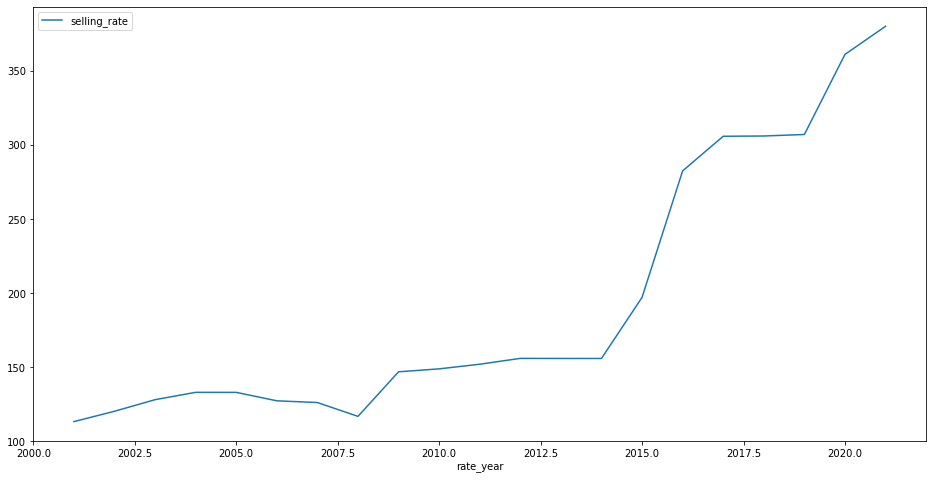

In [30]:
df.groupby("rate_year").median().plot(figsize=(16,8))

<AxesSubplot:xlabel='rate_year'>

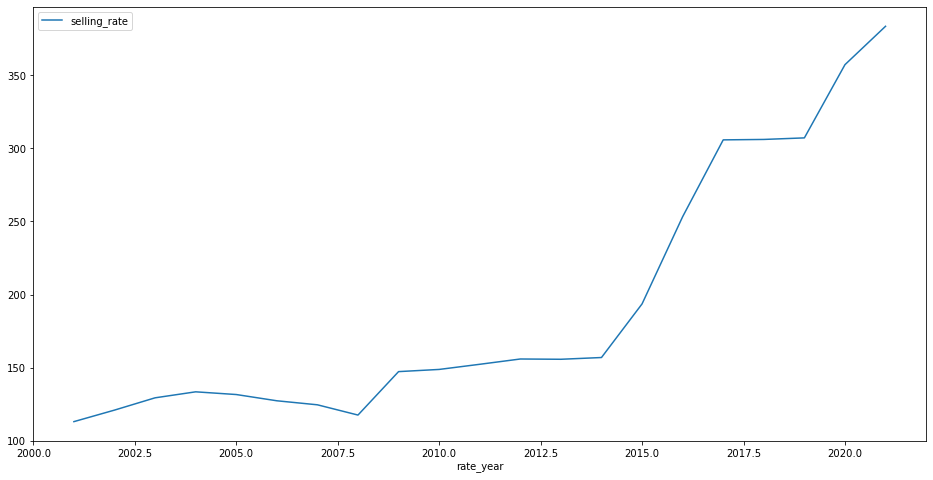

In [31]:
df.groupby("rate_year").mean().plot(figsize=(16,8))

In [32]:
a = [10,20,30,40,4000,50000]

In [33]:
np.mean(a)

9016.666666666666

In [34]:
np.median(a)

35.0

In [35]:
b = [10,20,30,35,40,4000,50000]

In [36]:
np.mean(b)

7733.571428571428

In [37]:
np.median(b)

35.0

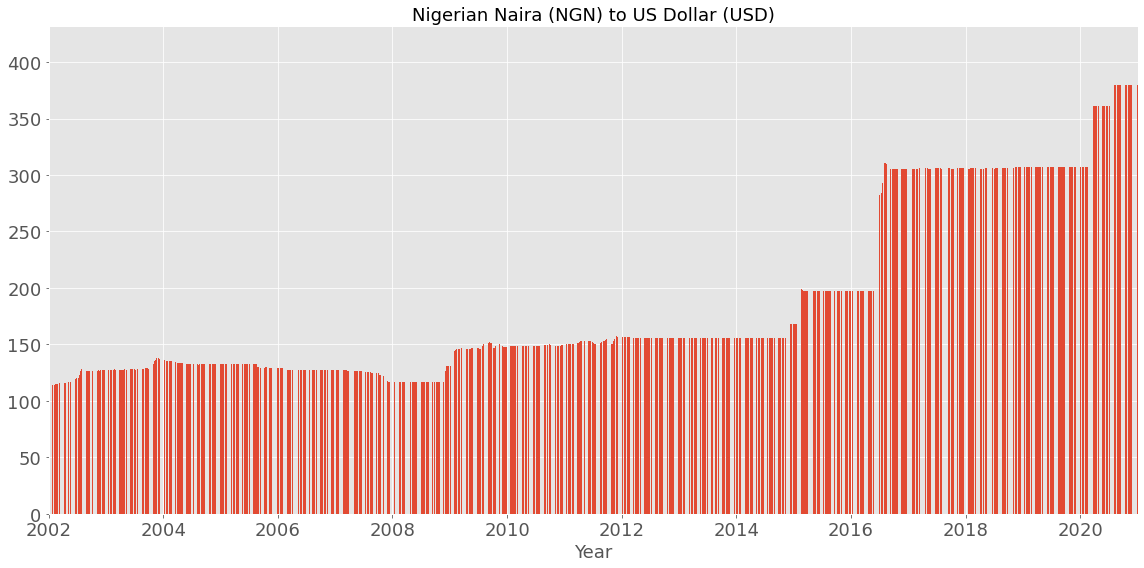

In [38]:
plt.style.use('ggplot')

plt.figure(figsize=(16,8))
plt.title("Nigerian Naira (NGN) to US Dollar (USD)", fontsize=18)
plt.bar(df["rate_date"],df["selling_rate"])
plt.xlabel("Year", fontsize=18)
plt.xlim("2002","2021")
plt.tick_params(labelsize=18)
plt.tight_layout()


In [39]:
df1 = df.groupby("rate_year").mean().reset_index()

In [40]:
df1

,rate_year,selling_rate
0,2001,113.115385
1,2002,120.992724
2,2003,129.394286
3,2004,133.493800
4,2005,131.644609
5,2006,127.373580
6,2007,124.617696
7,2008,117.605904
8,2009,147.314878
9,2010,148.805894


In [41]:
year = df1["rate_year"]

In [42]:
year

0     2001
1     2002
2     2003
3     2004
4     2005
5     2006
6     2007
7     2008
8     2009
9     2010
10    2011
11    2012
12    2013
13    2014
14    2015
15    2016
16    2017
17    2018
18    2019
19    2020
20    2021
Name: rate_year, dtype: int64

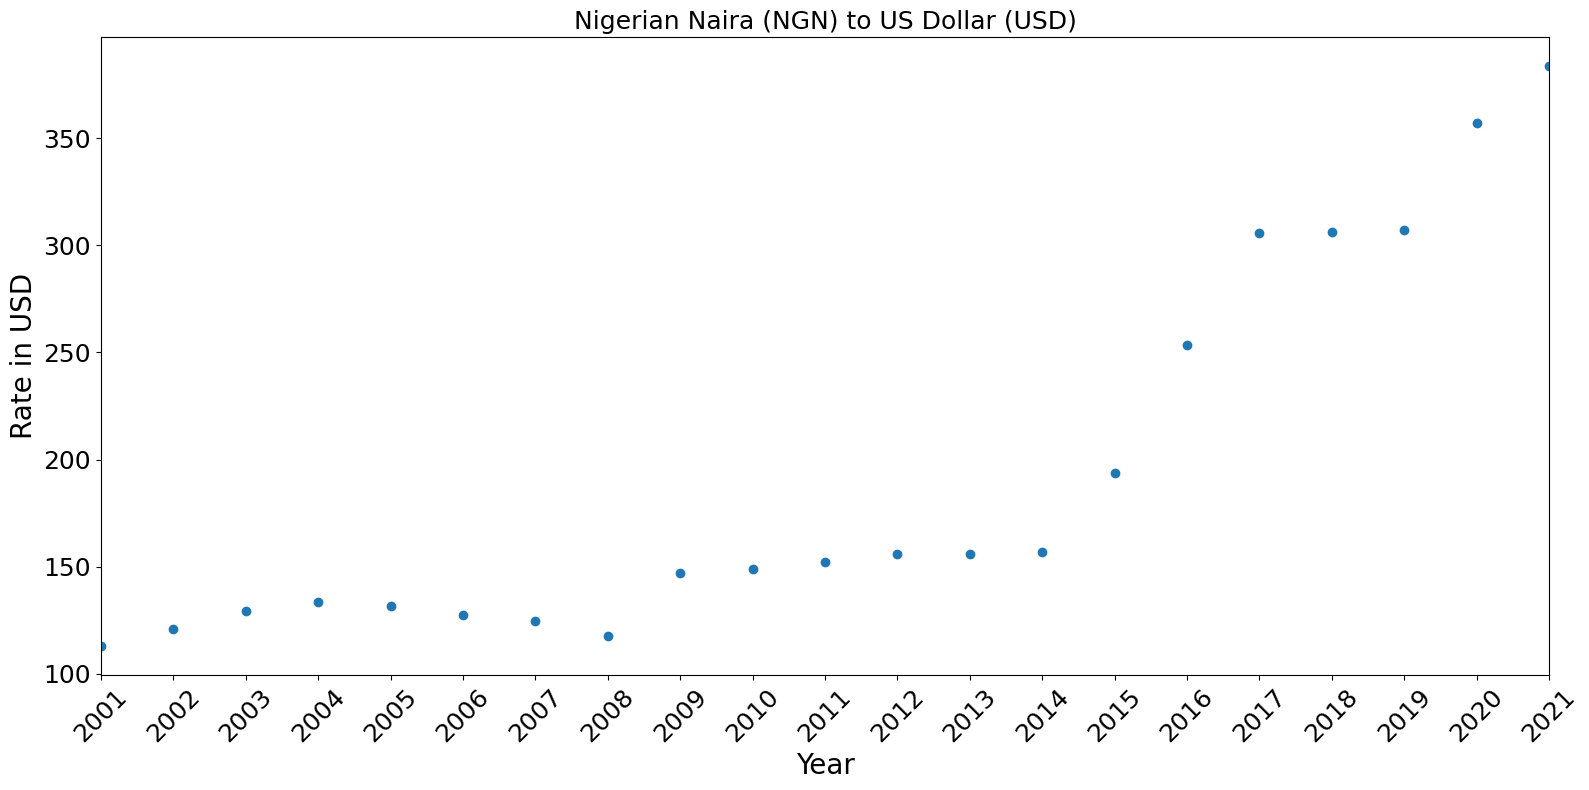

In [43]:
plt.style.use('default')


plt.figure(figsize=(16,8))
plt.title("Nigerian Naira (NGN) to US Dollar (USD)", fontsize=18)
plt.scatter(df1["rate_year"],df1["selling_rate"])
plt.ylabel("Rate in USD", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
plt.xlim(2001,2021)
plt.tick_params(labelsize=18)
plt.tight_layout()


# Same Figure as Above presented using an X-Y plot

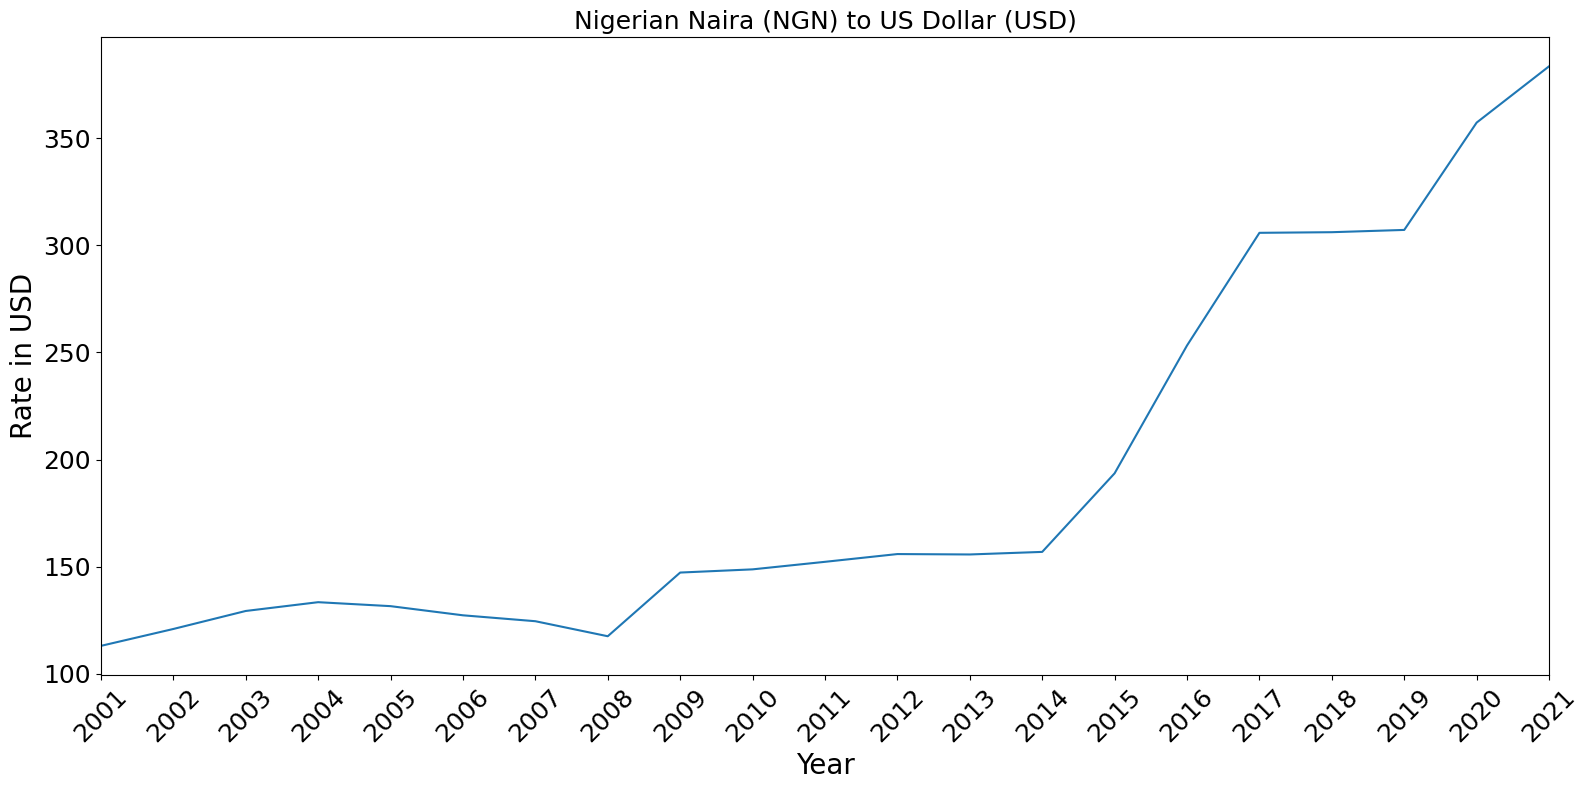

In [44]:
plt.style.use('default')


plt.figure(figsize=(16,8))
plt.title("Nigerian Naira (NGN) to US Dollar (USD)", fontsize=18)
plt.plot(df1["rate_year"],df1["selling_rate"])
plt.ylabel("Rate in USD", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
plt.xlim(2001,2021)
plt.tick_params(labelsize=18)
plt.tight_layout()

# Same Figure as Above presented using a bar chart

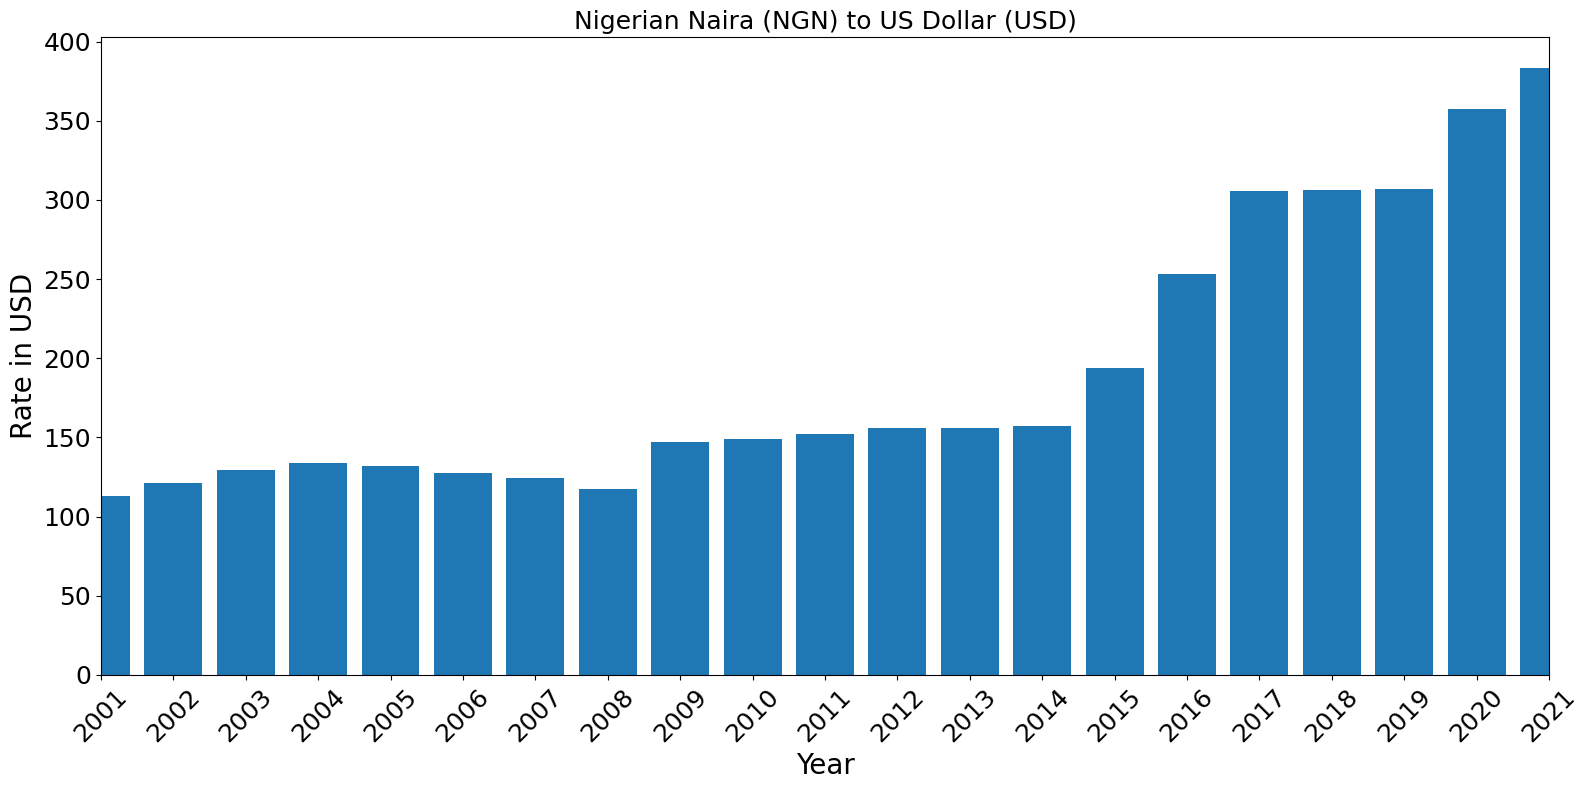

In [45]:
plt.style.use('default')


plt.figure(figsize=(16,8))
plt.title("Nigerian Naira (NGN) to US Dollar (USD)", fontsize=18)
plt.bar(df1["rate_year"],df1["selling_rate"])
plt.ylabel("Rate in USD", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
plt.xlim(2001,2021)
plt.tick_params(labelsize=18)
plt.tight_layout()

# Machine Learning Section (Decision Tree and Random Forest)

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
df1.head(1)

,rate_year,selling_rate
0,2001,113.115385


In [48]:
y = df1.selling_rate

In [49]:
X = np.array(df1.rate_year)

In [50]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state=1)

# Decision Tree 

In [51]:
rate_model1 = DecisionTreeRegressor(random_state=1)

In [52]:
rate_model1.fit(train_X.reshape(-1, 1), train_y)

DecisionTreeRegressor(random_state=1)

In [53]:
val_predictions = rate_model1.predict(val_X.reshape(-1, 1))

In [54]:
val_mae = mean_absolute_error(val_predictions, val_y)

In [55]:
print(val_mae)

23.519267423672567


In [56]:
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))


Validation MAE when not specifying max_leaf_nodes: 24


In [57]:
rate_model1 = DecisionTreeRegressor (max_leaf_nodes=1000, random_state=1)
rate_model1.fit(train_X.reshape(-1, 1), train_y)
val_predictions = rate_model1.predict(val_X.reshape(-1, 1))
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))


Validation MAE for best value of max_leaf_nodes: 24


# Random Forest

In [58]:
rf_model = RandomForestRegressor(random_state=1)


In [59]:
rf_model.fit(train_X.reshape(-1, 1), train_y)

RandomForestRegressor(random_state=1)

In [60]:
pred = rf_model.predict(val_X.reshape(-1, 1))

In [61]:
rf_val_mae = mean_absolute_error(val_y, pred)


In [62]:
print(val_y)
print(pred)

15    253.234073
10    152.322675
3     133.493800
18    307.142975
17    306.081000
Name: selling_rate, dtype: float64
[217.09367482 149.93944757 129.1130092  342.48154218 312.06512133]


In [63]:
print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))


Validation MAE for Random Forest Model: 16.845420836748684


With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as

On average, our predictions are off by about X.

In [64]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(val_y, pred))
print('Mean Squared Error:', metrics.mean_squared_error(val_y, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y, pred)))

Mean Absolute Error: 16.845420836748684
Mean Squared Error: 523.1246948350931
Root Mean Squared Error: 22.871919351796716


In [65]:
df1.describe()

,rate_year,selling_rate
count,21.000000,21.000000
mean,2011.000000,191.517135
std,6.204837,87.378491
min,2001.000000,113.115385
25%,2006.000000,129.394286
50%,2011.000000,152.322675
75%,2016.000000,253.234073
max,2021.000000,383.461979


In [66]:
100 - ((16.845420836748684/191.517135) * 100)

91.20422262125597

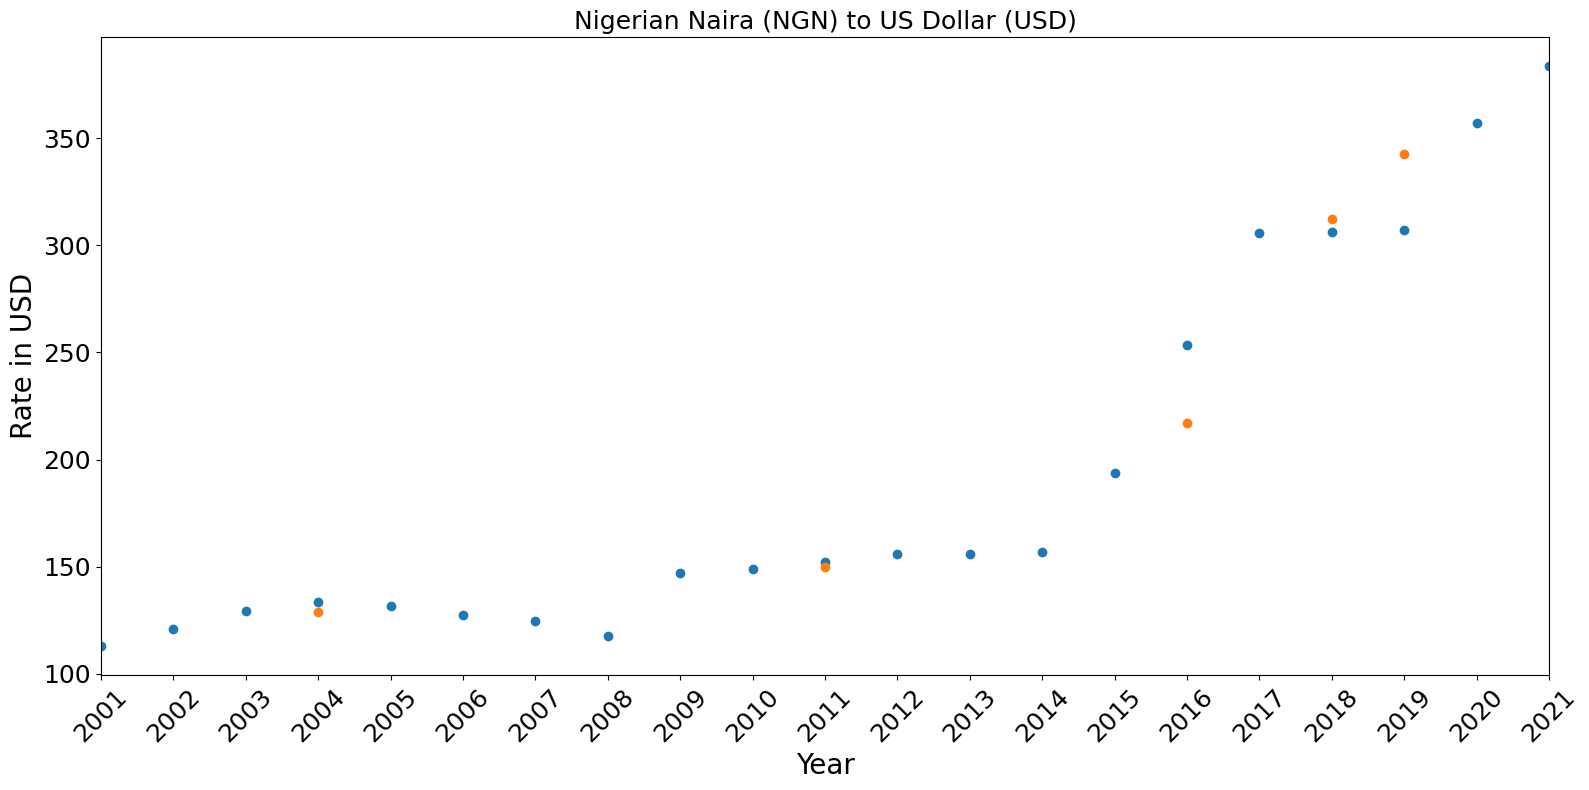

In [67]:
plt.style.use('default')

plt.figure(figsize=(16,8))
plt.title("Nigerian Naira (NGN) to US Dollar (USD)", fontsize=18)
plt.scatter(df1["rate_year"],df1["selling_rate"])
plt.scatter(val_X, pred)
plt.ylabel("Rate in USD", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
plt.xlim(2001,2021)
plt.tick_params(labelsize=18)
plt.tight_layout()

In [68]:
df1

,rate_year,selling_rate
0,2001,113.115385
1,2002,120.992724
2,2003,129.394286
3,2004,133.493800
4,2005,131.644609
5,2006,127.373580
6,2007,124.617696
7,2008,117.605904
8,2009,147.314878
9,2010,148.805894


In [69]:
df1.drop(df1.index[[1,20]])

,rate_year,selling_rate
0,2001,113.115385
2,2003,129.394286
3,2004,133.493800
4,2005,131.644609
5,2006,127.373580
6,2007,124.617696
7,2008,117.605904
8,2009,147.314878
9,2010,148.805894
10,2011,152.322675


In [70]:
df2 = df1.drop(df1.index[[20]])

In [71]:
df2

,rate_year,selling_rate
0,2001,113.115385
1,2002,120.992724
2,2003,129.394286
3,2004,133.493800
4,2005,131.644609
5,2006,127.373580
6,2007,124.617696
7,2008,117.605904
8,2009,147.314878
9,2010,148.805894


Check out - https://youtu.be/QIUxPv5PJOY 

Check out - https://youtu.be/hOLSGMEEwlI 

In [72]:
df2.to_csv("average_year.csv", index=False)

In [75]:
df

,rate_date,currency,rate_year,rate_month,selling_rate
0,2021-06-04,US DOLLAR,2021,June,410.18
12,2021-06-03,US DOLLAR,2021,June,410.20
24,2021-06-02,US DOLLAR,2021,June,410.22
36,2021-06-01,US DOLLAR,2021,June,410.00
48,2021-05-31,US DOLLAR,2021,May,410.00
...,...,...,...,...,...
46433,2001-12-14,US DOLLAR,2001,December,113.10
46436,2001-12-13,US DOLLAR,2001,December,112.85
46445,2001-12-12,US DOLLAR,2001,December,112.85
46448,2001-12-11,US DOLLAR,2001,December,112.85


In [76]:
df2

,rate_year,selling_rate
0,2001,113.115385
1,2002,120.992724
2,2003,129.394286
3,2004,133.493800
4,2005,131.644609
5,2006,127.373580
6,2007,124.617696
7,2008,117.605904
8,2009,147.314878
9,2010,148.805894


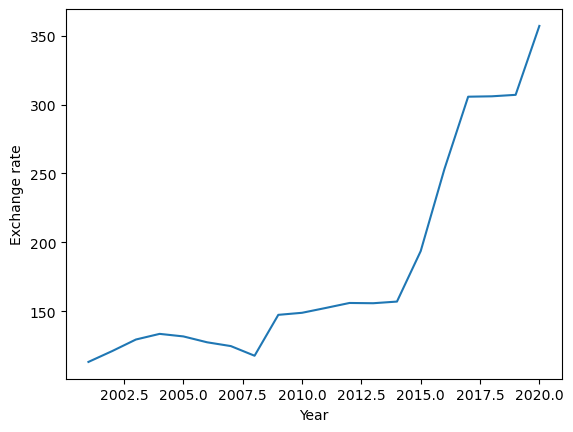

In [77]:
plt.xlabel("Year")
plt.ylabel("Exchange rate")
plt.plot(df2["rate_year"],df2["selling_rate"]);

In [78]:
df2.set_index(["rate_year"])

,selling_rate
rate_year,
2001,113.115385
2002,120.992724
2003,129.394286
2004,133.493800
2005,131.644609
2006,127.373580
2007,124.617696
2008,117.605904
2009,147.314878


In [79]:
indexedDataset = df2.set_index(["rate_year"])

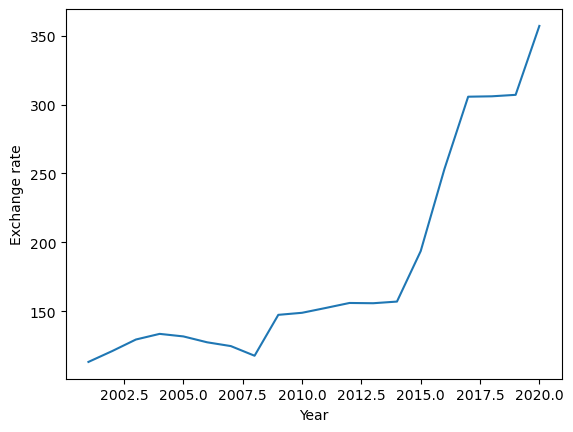

In [80]:
plt.xlabel("Year")
plt.ylabel("Exchange rate")
plt.plot(indexedDataset);

In [81]:
#Determine rolling statistics

rolmean = indexedDataset.rolling(window=2).mean()

rolstd = indexedDataset.rolling(window=2).std()

print (rolmean, rolstd)

           selling_rate
rate_year              
2001                NaN
2002         117.054054
2003         125.193505
2004         131.444043
2005         132.569205
2006         129.509095
2007         125.995638
2008         121.111800
2009         132.460391
2010         148.060386
2011         150.564285
2012         154.132464
2013         155.847760
2014         156.352812
2015         175.282247
2016         223.423105
2017         279.511606
2018         305.935070
2019         306.611988
2020         332.176098            selling_rate
rate_year              
2001                NaN
2002           5.570120
2003           5.940802
2004           2.898794
2005           1.307575
2006           3.020073
2007           1.948705
2008           4.958086
2009          21.007417
2010           1.054308
2011           2.486739
2012           2.559429
2013           0.133635
2014           0.847886
2015          25.922379
2016          42.159075
2017          37.162044
2018           0

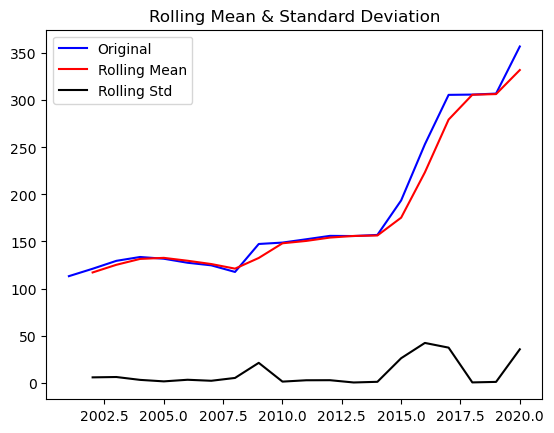

In [82]:
#Plot rolling statistics

orig = plt.plot(indexedDataset, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd, color="black", label = "Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=None)

In [89]:
#checks if result is stationary using the p-values and Test Statistics values

from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller TEst:")
dftest = adfuller(indexedDataset["selling_rate"], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", 'Number of Observation Used'])

for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" %key] = value
    
print(dfoutput)

Results of Dickey-Fuller TEst:
Test Statistic                 1.750497
p-value                        0.998246
#Lags Used                     7.000000
Number of Observation Used    12.000000
Critical Value (1%)           -4.137829
Critical Value (5%)           -3.154972
Critical Value (10%)          -2.714477
dtype: float64


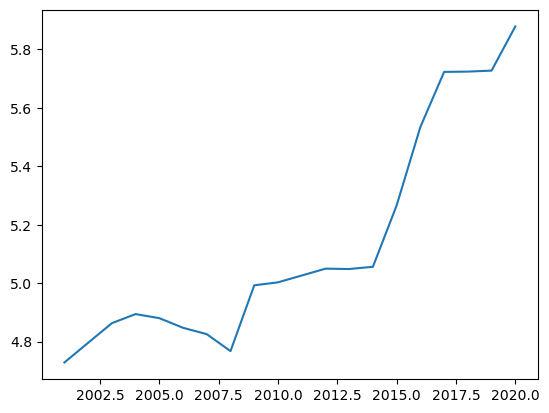

In [90]:
#Estimating trend#

indexedDataset_logScale = np.log(indexedDataset)

plt.plot(indexedDataset_logScale)

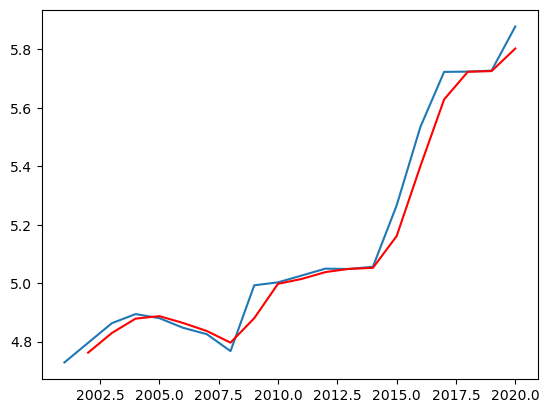

In [93]:
#Determine rolling statistics

movingAverage = indexedDataset_logScale.rolling(window=2).mean()

movingSTD = indexedDataset_logScale.rolling(window=2).std()

#print (movingAverage, movingSTD)



#Plot rolling statistics with logscale 

plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color="red")





In [97]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head()

#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head()

,selling_rate
rate_year,
2002,0.033661
2003,0.033567
2004,0.015595
2005,-0.006975
2006,-0.016491


In [98]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity (timeseries):
    
    #Determine rolling statistics 
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(movingAverage, color="red", label="Rolling Mean")
    std = plt.plot(movingSTD, color="black", label = "Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=None)
    
    #Perform Dickey-fuller test:
    print ("Result ")
    
    print("Results of Dickey-Fuller TEst:")
    dftest = adfuller(timeseries["selling_rate"], autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", 'Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" %key] = value
    print(dfoutput)

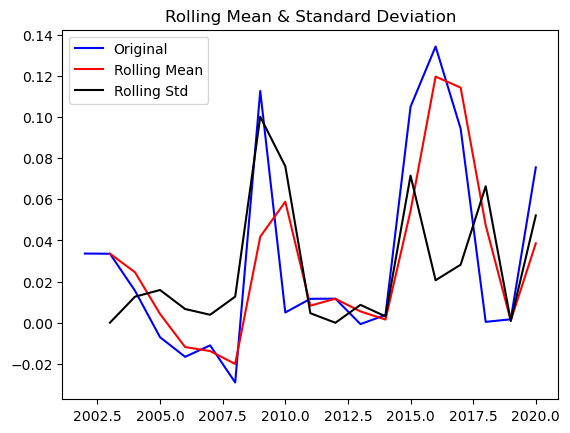

Result 
Results of Dickey-Fuller TEst:
Test Statistic                -2.877378
p-value                        0.048043
#Lags Used                     0.000000
Number of Observation Used    18.000000
Critical Value (1%)           -3.859073
Critical Value (5%)           -3.042046
Critical Value (10%)          -2.660906
dtype: float64


In [99]:
test_stationarity(datasetLogScaleMinusMovingAverage)

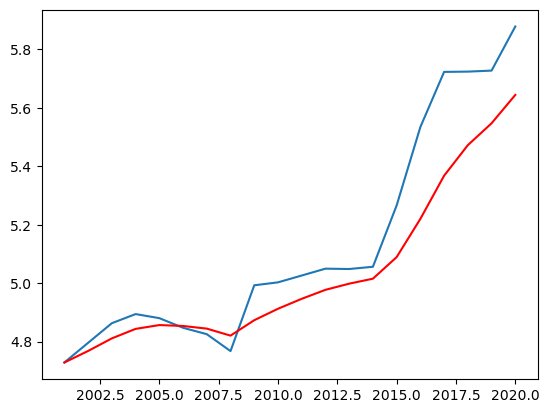

In [101]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=2, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = "red")

In [102]:
from statsmodels.tsa.arima_model import ARIMA

In [105]:
df.reset_index()

,index,rate_date,currency,rate_year,rate_month,selling_rate
0,0,2021-06-04,US DOLLAR,2021,June,410.18
1,12,2021-06-03,US DOLLAR,2021,June,410.20
2,24,2021-06-02,US DOLLAR,2021,June,410.22
3,36,2021-06-01,US DOLLAR,2021,June,410.00
4,48,2021-05-31,US DOLLAR,2021,May,410.00
...,...,...,...,...,...,...
4759,46433,2001-12-14,US DOLLAR,2001,December,113.10
4760,46436,2001-12-13,US DOLLAR,2001,December,112.85
4761,46445,2001-12-12,US DOLLAR,2001,December,112.85
4762,46448,2001-12-11,US DOLLAR,2001,December,112.85


In [ ]:
indexedDataset = df2.set_index(["rate_year"])

In [130]:
df3 = df.set_index("rate_date")

In [131]:
df3

,currency,rate_year,rate_month,selling_rate
rate_date,,,,
2021-06-04,US DOLLAR,2021,June,410.18
2021-06-03,US DOLLAR,2021,June,410.20
2021-06-02,US DOLLAR,2021,June,410.22
2021-06-01,US DOLLAR,2021,June,410.00
2021-05-31,US DOLLAR,2021,May,410.00
...,...,...,...,...
2001-12-14,US DOLLAR,2001,December,113.10
2001-12-13,US DOLLAR,2001,December,112.85
2001-12-12,US DOLLAR,2001,December,112.85


In [136]:
df3 = df3[df3["rate_year"]!=2021]

In [137]:
df3.head()

,currency,rate_year,rate_month,selling_rate
rate_date,,,,
2021-05-07,US DOLLAR,2020,May,380.0
2020-12-31,US DOLLAR,2020,December,380.0
2020-12-30,US DOLLAR,2020,December,380.0
2020-12-29,US DOLLAR,2020,December,380.0
2020-12-24,US DOLLAR,2020,December,380.0


In [140]:
df3.drop(df3.index[[0]], inplace=True)

C:\Users\bunmi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [146]:
df3.drop(columns=["currency","rate_year", "rate_month"], inplace=True)

C:\Users\bunmi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [147]:
df3

,selling_rate
rate_date,
2020-12-31,380.00
2020-12-30,380.00
2020-12-29,380.00
2020-12-24,380.00
2020-12-23,380.00
...,...
2001-12-14,113.10
2001-12-13,112.85
2001-12-12,112.85


<AxesSubplot:xlabel='rate_date'>

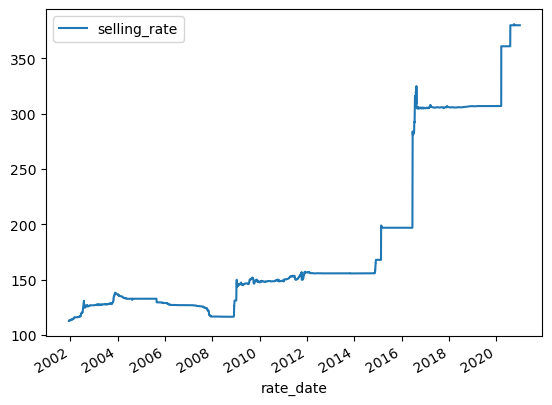

In [148]:
df3.plot()

In [150]:
##stationary?  = No

#means the mean, variance and covariance are constant over a period

In [151]:
df3.diff(periods=1)

,selling_rate
rate_date,
2020-12-31,NaN
2020-12-30,0.00
2020-12-29,0.00
2020-12-24,0.00
2020-12-23,0.00
...,...
2001-12-14,0.00
2001-12-13,-0.25
2001-12-12,0.00


In [167]:
rate_diff = df3.diff(periods=1)
#integrated order of 1 (whatever the period is). denoted by d (for diff), one of the parameters of ARIMA model

rate_diff.head(3) 

,selling_rate
rate_date,
2020-12-31,NaN
2020-12-30,0.0
2020-12-29,0.0


In [168]:
#Let's remove nan values

rate_diff = rate_diff[1:] #takes from index 1 (not zero)

In [169]:
rate_diff.head(3) 

,selling_rate
rate_date,
2020-12-30,0.0
2020-12-29,0.0
2020-12-24,0.0


In [170]:
#we need stationary data to do timeseries forecast

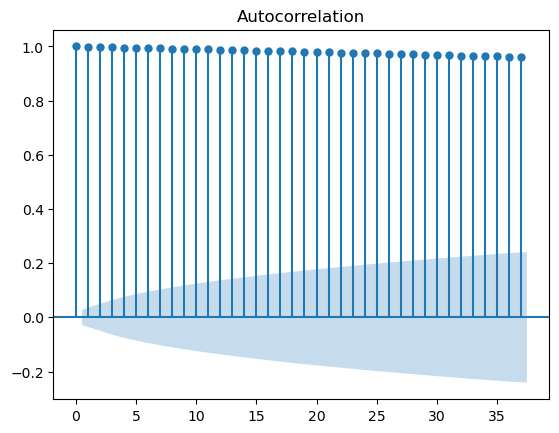

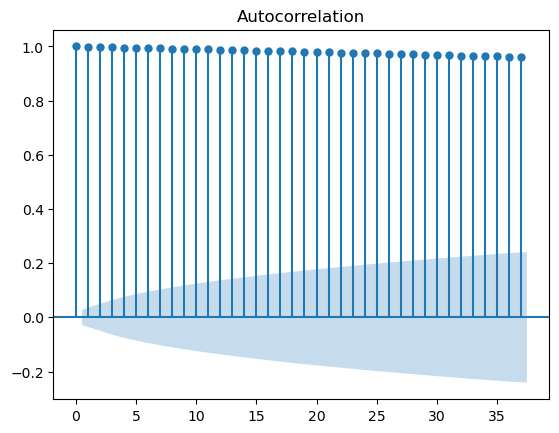

In [171]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df3)

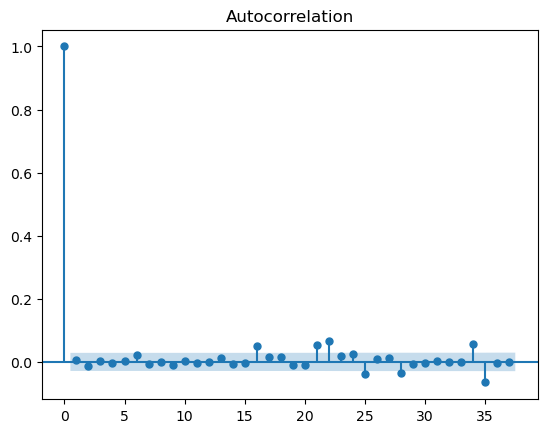

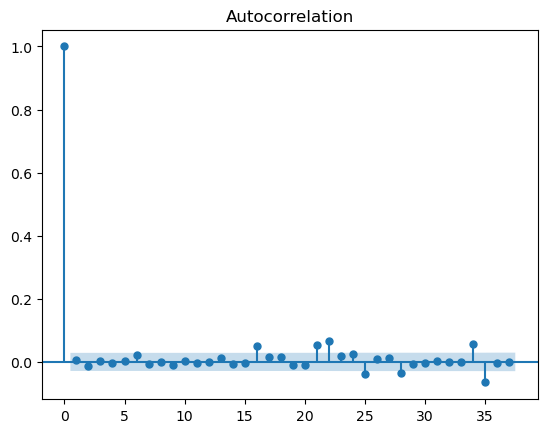

In [172]:
plot_acf(rate_diff)

<AxesSubplot:xlabel='rate_date'>

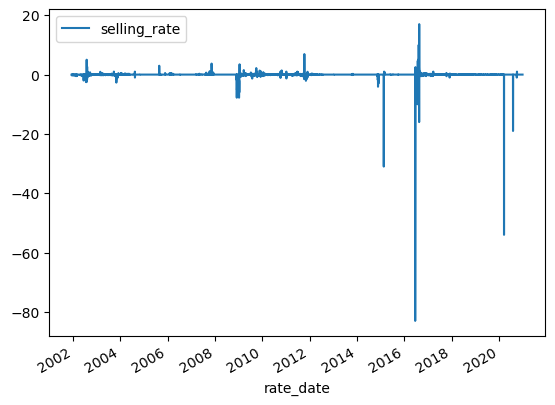

In [173]:
rate_diff.plot()

In [174]:
from statsmodels.tsa.ar_model import AR 
from sklearn.metrics import mean_squared_error 

<AxesSubplot:xlabel='rate_year'>

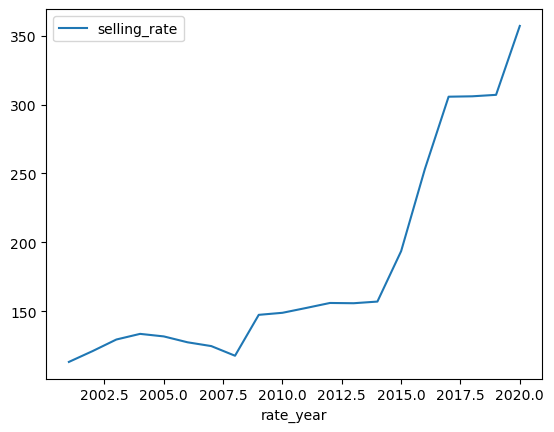

In [206]:
indexedDataset.plot()

In [207]:
indexedDataset.diff(periods=1)

,selling_rate
rate_year,
2001,NaN
2002,7.877339
2003,8.401562
2004,4.099514
2005,-1.849191
2006,-4.271029
2007,-2.755885
2008,-7.011792
2009,29.708974


In [209]:
indexedDataset_diff = indexedDataset[1:] #takes from index 1 (not zero)

In [210]:
indexedDataset_diff

,selling_rate
rate_year,
2002,120.992724
2003,129.394286
2004,133.493800
2005,131.644609
2006,127.373580
2007,124.617696
2008,117.605904
2009,147.314878
2010,148.805894


In [185]:
year_diff = indexedDataset.diff(periods=1)

In [186]:
year_diff = year_diff[1:]

In [187]:
year_diff

,selling_rate
rate_year,
2002,7.877339
2003,8.401562
2004,4.099514
2005,-1.849191
2006,-4.271029
2007,-2.755885
2008,-7.011792
2009,29.708974
2010,1.491016


In [216]:
X = indexedDataset_diff.selling_rate

In [217]:
X

rate_year
2002    120.992724
2003    129.394286
2004    133.493800
2005    131.644609
2006    127.373580
2007    124.617696
2008    117.605904
2009    147.314878
2010    148.805894
2011    152.322675
2012    155.942254
2013    155.753266
2014    156.952358
2015    193.612137
2016    253.234073
2017    305.789139
2018    306.081000
2019    307.142975
2020    357.209221
Name: selling_rate, dtype: float64

In [218]:
train = X [0:15] #15 data to train
test = X[15:] #5 data to test
predictions = []

In [226]:
train

rate_year
2002    120.992724
2003    129.394286
2004    133.493800
2005    131.644609
2006    127.373580
2007    124.617696
2008    117.605904
2009    147.314878
2010    148.805894
2011    152.322675
2012    155.942254
2013    155.753266
2014    156.952358
2015    193.612137
2016    253.234073
Name: selling_rate, dtype: float64

# Auto regressive AR model

In [219]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [220]:
model_ar_fit.predict(start=15, end=20)

15    234.344589
16    305.007482
17    335.297078
18    375.617413
19    494.667840
20    680.504909
dtype: float64

In [221]:
prediction_1 = model_ar_fit.predict(start=15, end=20)

In [222]:
test

rate_year
2017    305.789139
2018    306.081000
2019    307.142975
2020    357.209221
Name: selling_rate, dtype: float64

# ARIMA model

In [223]:
from statsmodels.tsa.arima_model import ARIMA 

In [236]:
#p,d,q, 
#p = periods taken for autoregressive model (i.e. time units)
#d = Integrated order, number of times differencing is done (typicall one or two)
#q = periods in moving average model

model_arima = ARIMA(train, order=(1,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

124.35600287670476


C:\Users\bunmi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\bunmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

In [249]:
prediction_2 = model_arima_fit.forecast(steps=4)[0]
prediction_2

array([293.58096027, 322.71164352, 345.31558588, 364.1215994 ])

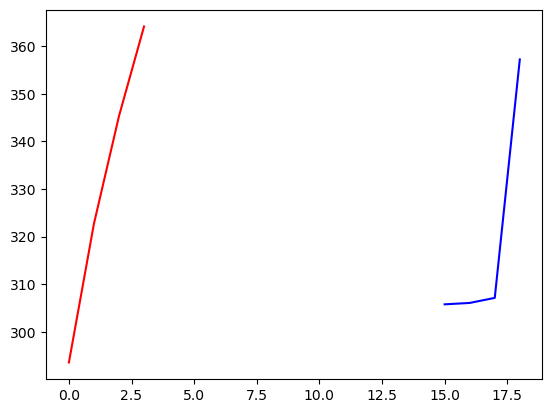

In [273]:
plt.plot(test_2, color="blue", label="Test")
plt.plot(prediction_2, color="red", label="Predict")


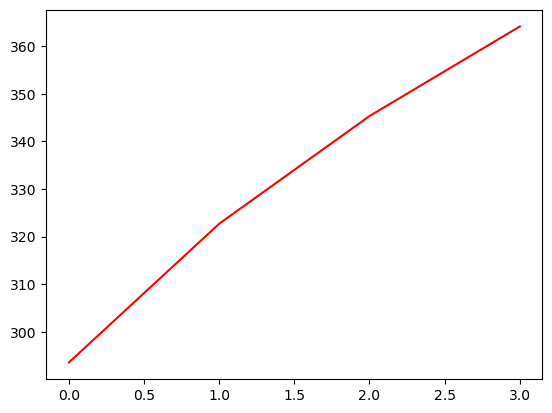

In [251]:
plt.plot(prediction_2, color="red", label="Predict")


In [274]:
print(test)
print(prediction_2)

rate_year
2017    305.789139
2018    306.081000
2019    307.142975
2020    357.209221
Name: selling_rate, dtype: float64
[293.58096027 322.71164352 345.31558588 364.1215994 ]


In [276]:
mean_squared_error(test, prediction_2)

482.63677914698843